In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df=pd.read_csv('/content/drive/MyDrive/DuplicateQuestions/train.csv')

In [3]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.dropna(inplace=True,axis=0)

In [5]:
df=df.sample(50000,random_state=42)

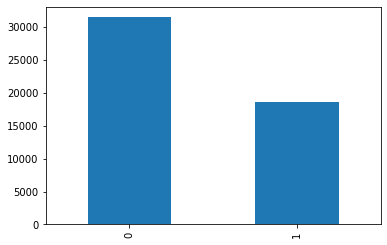

In [6]:
df['is_duplicate'].value_counts().plot(kind='bar')

**Some Fetaures In Mind**  
1.q1.length,q2.length  
2.q1.words, q2.words  
3.words common  
4.Total words

In [7]:
df['q1_len']=df['question1'].str.len()
df['q2_len']=df['question2'].str.len()
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63


In [8]:
df['q1_words']=df['question1'].apply(lambda x : len(x.split(' ')))
df['q2_words']=df['question2'].apply(lambda x : len(x.split(' ')))
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11


In [9]:
def commonWord(row):
  set1=set(row['question1'].lower().strip().split(' '))
  set2=set(row['question2'].lower().strip().split(' '))
  return len(set1&set2)

In [10]:
set("How do I play Pokémon GO in Korea?".lower().strip().split(' '))

{'do', 'go', 'how', 'i', 'in', 'korea?', 'play', 'pokémon'}

In [11]:
df['common_words']=df.apply(commonWord,axis=1)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11,1


In [12]:
def totalWord(row):
  set1=set(row['question1'].lower().strip().split(' '))
  set2=set(row['question2'].lower().strip().split(' '))
  return len(set1)+len(set2)

In [13]:
df['total_words']=df.apply(totalWord,axis=1)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11,1,17


In [14]:
df['word_share']=round(df['common_words']/df['total_words'],2)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16,0.44
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11,1,17,0.06


In [15]:
def plotDist(df,col):
  sns.distplot(df[df['is_duplicate'] == 0][col],label='non duplicate')
  sns.distplot(df[df['is_duplicate'] == 1][col],label='duplicate')
  plt.legend()
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


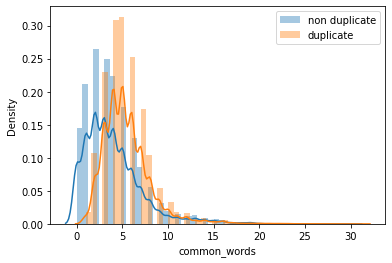

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


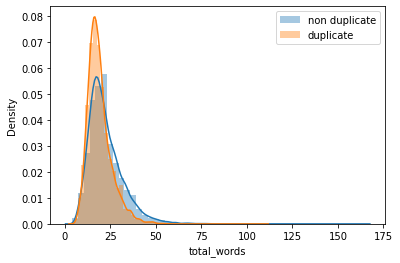

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


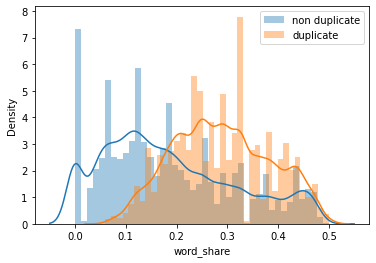

In [16]:
plotDist(df,'common_words')
plotDist(df,'total_words')
plotDist(df,'word_share')

In [17]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16,0.44
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11,1,17,0.06
252452,252452,336023,366789,Is Kellyanne Conway annoying in your opinion?,Did Kellyanne Conway really imply that we shou...,0,45,118,7,21,2,27,0.07
174039,174039,268330,268331,How do you rate (1-10) and review Maruti Baleno?,What career options does one have after comple...,0,48,127,9,20,0,27,0.00
384863,384863,28901,233483,What are some good books on marketing?,What are some of the best books ever written a...,1,38,61,7,11,5,18,0.28


In [18]:
ques=df.iloc[:,3:5]
ques.head(2)

,question1,question2
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?
224279,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques['question1']) + list(ques['question2'])

cv = CountVectorizer(max_features=1500)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [20]:
temp_df1 = pd.DataFrame(q1_arr, index= ques.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 3000)

In [21]:
df1=pd.concat([df.iloc[:,5:],temp_df],axis=1)

In [22]:
df1.shape

(50000, 3008)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df1.iloc[:,1:].values,df1.iloc[:,0].values,test_size=0.2,random_state=1)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7841